In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Convert notebook to .py file
!jupyter nbconvert --to script ../L_layer_deeplearning_class/nn_class.ipynb

# Add correct absolute path to sys.path
sys.path.append(os.path.abspath(r"..\L_layer_deeplearning_class"))

# Now import the class
from nn_class import L_layer_NN

[NbConvertApp] Converting notebook ../L_layer_deeplearning_class/nn_class.ipynb to script
[NbConvertApp] Writing 13727 bytes to ..\L_layer_deeplearning_class\nn_class.py


In [4]:
dataset_path = r"C:\Users\lucas\OneDrive\Desktop\Deep Learning Speciliazation\Data Sets\diabetes_prediction\diabetes_prediction_dataset.csv"
df = pd.read_csv(dataset_path)

In [5]:
features = df.columns
shape = df.shape
print(f"Number of features: {len(features) - 1} \n") 
print(f"Features: {features} \n")
print(f"Shape: {shape} \n\n")
print(df.head())
print("\n\n")
print(df.info())
print("\n\n")
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n\n")

#todos in dataset:
#decision: keep No Info from smoking_history as its own category
# 1. One hot encode: gender and smoking_history
# 2. Normalize: age, bmi, HbA1c_level, blood_glucose_level

Number of features: 8 

Features: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object') 

Shape: (100000, 9) 


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entr

In [6]:
#One hot encoding of gender:
gender_encoded = pd.get_dummies(df["gender"], prefix="gender")
df = pd.concat([df, gender_encoded], axis = 1)
df = df.drop("gender", axis=1)
#One hot encoding of smoking_history:
smoking_encoded = pd.get_dummies(df["smoking_history"], prefix="smoke")
df = pd.concat([df, smoking_encoded], axis = 1)
df = df.drop("smoking_history", axis=1)
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoke_No Info,smoke_current,smoke_ever,smoke_former,smoke_never,smoke_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,True,False,False,True,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,True,False,False,True,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,False,True,False,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,True,False,False,False,False,False,False,True,False


In [7]:
#Splitting dataset: training, dev, test -> 60, 20, 20
X = df.drop("diabetes", axis = 1)
y = df["diabetes"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.02, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_dev: {X_dev.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Size of Y_train: {y_train.shape}")

Shape of X_train: (98000, 15)
Shape of X_dev: (1000, 15)
Shape of X_test: (1000, 15)
Size of Y_train: (98000,)


In [8]:
#normalizing dataset (use values from X_train to X_dev and X_test)
mean = X_train.mean()
std = X_train.std()

# Z-score of each dataset:
X_train = (X_train - mean) / std
X_dev = (X_dev - mean) / std
X_test = (X_test - mean) / std

# Make all numpy arrays & make (features, example)
X_train = X_train.to_numpy().T
X_dev = X_dev.to_numpy().T
X_test = X_test.to_numpy().T

#(1, m)
y_train = y_train.to_numpy().reshape(1, -1)
y_dev   = y_dev.to_numpy().reshape(1, -1)
y_test  = y_test.to_numpy().reshape(1, -1)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_dev: {X_dev.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Size of Y_train: {y_train.shape}")

Shape of X_train: (15, 98000)
Shape of X_dev: (15, 1000)
Shape of X_test: (15, 1000)
Size of Y_train: (1, 98000)


<p style="margin: 30px; font-size: 15px">Data has been handled and stored in X_train, X_dev, X_test, y_train, y_dev, y_test, as numpy arrays with shape expected by NeuronNetwork</p>


41.871428571428574
42.699999999999996
43.8


Training: 100%|█████████████████████████████████████| 1000/1000 [20:07<00:00,  1.21s/it, Mean cost=0.05876620354449065]


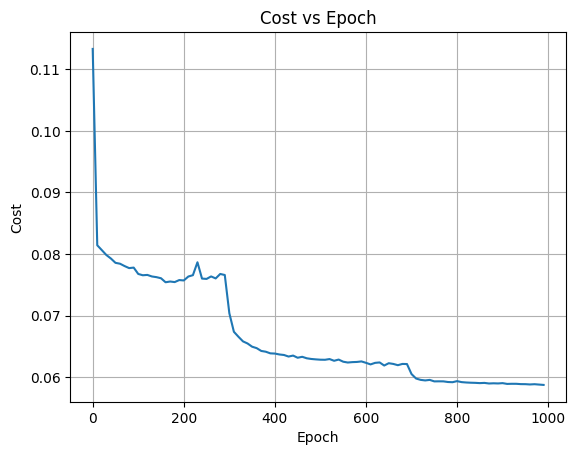

In [9]:
#train model:
layers_dims = [X_train.shape[0], 64, 32, 16, 1]
model = L_layer_NN(layer_dims=layers_dims, optimizer ="adam", learning_rate=0.01)
print(model.accuracy(X_train, y_train))
print(model.accuracy(X_dev, y_dev))
print(model.accuracy(X_test, y_test))
model.train(X_train, y_train, epochs=1000, print_cost=True)

# Plot cost graph
model.plot_cost()
#cost=0.04239374782412526]

In [10]:
print(model.learning_rate)
model.accuracy(X_train, y_train)
#98.205

0.0001


np.float64(97.63571428571429)

In [11]:
model.accuracy(X_dev, y_dev)
#95.895

np.float64(96.7)

In [12]:
model.accuracy(X_test, y_test)

np.float64(96.89999999999999)

In [12]:
model.learning_rate = 0.00001

In [14]:
model.train(X_train, y_train, epochs=300, print_cost=True)

Training: 100%|██████████████████████████████████████| 300/300 [03:05<00:00,  1.62it/s, Mean cost=0.041855793214456934]


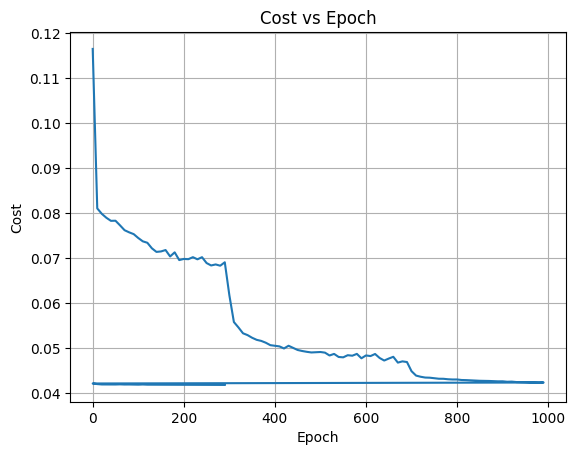

In [15]:
model.plot_cost()

In [16]:
print(model.learning_rate)
model.accuracy(X_train, y_train)

1e-05


np.float64(98.22999999999999)

In [31]:
predictions = model.predict(X_train)
unique, counts = np.unique(predictions, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(57646), np.int64(1): np.int64(2354)}
